<Body>

<h1> <b>Control and Optimization 2022/2023 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt), **Fernando Fontes** (faf@fe.up.pt)



FEUP, Fev. 2023

---


# **Project of Control and Optimization (Part I and Part II)**

**Note:** This is to be done in group of **3** elements. Use this notebook to answer all the questions (note that you should include your computations in a picture format or in latex). At the end of the work, you should **send** the **notebook** and a **pdf file** with a printout of the notebook with all the results.

**Deadlines:** Present the state of your work (and answer questions) on the week of **May 15** in your corresponding practical class. Send the files until 23:59 of **June 2, 2023**.


---



In [ ]:
# To make a nice pdf file of this file, you have to do the following:
# - upload your file to print into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "CO_project1and2.ipynb"
# Then just download the html file and print it to pdf!

[NbConvertApp] Converting notebook CO_project1and2.ipynb to html
[NbConvertApp] Writing 1822006 bytes to CO_project1and2.html


# **Identification**

* **Group:** 12
* **Name:** Rafael Amaral Pina Aguiar
* **Student Number:** 201904694

* **Name:** Ricardo Carvalho Araújo
* **Student Number:** 201906663

* **Name:**
* **Student Number:**

---




# An Autonomous Underwtare Vehicle (UAV) model in the vertical plan


<Body>
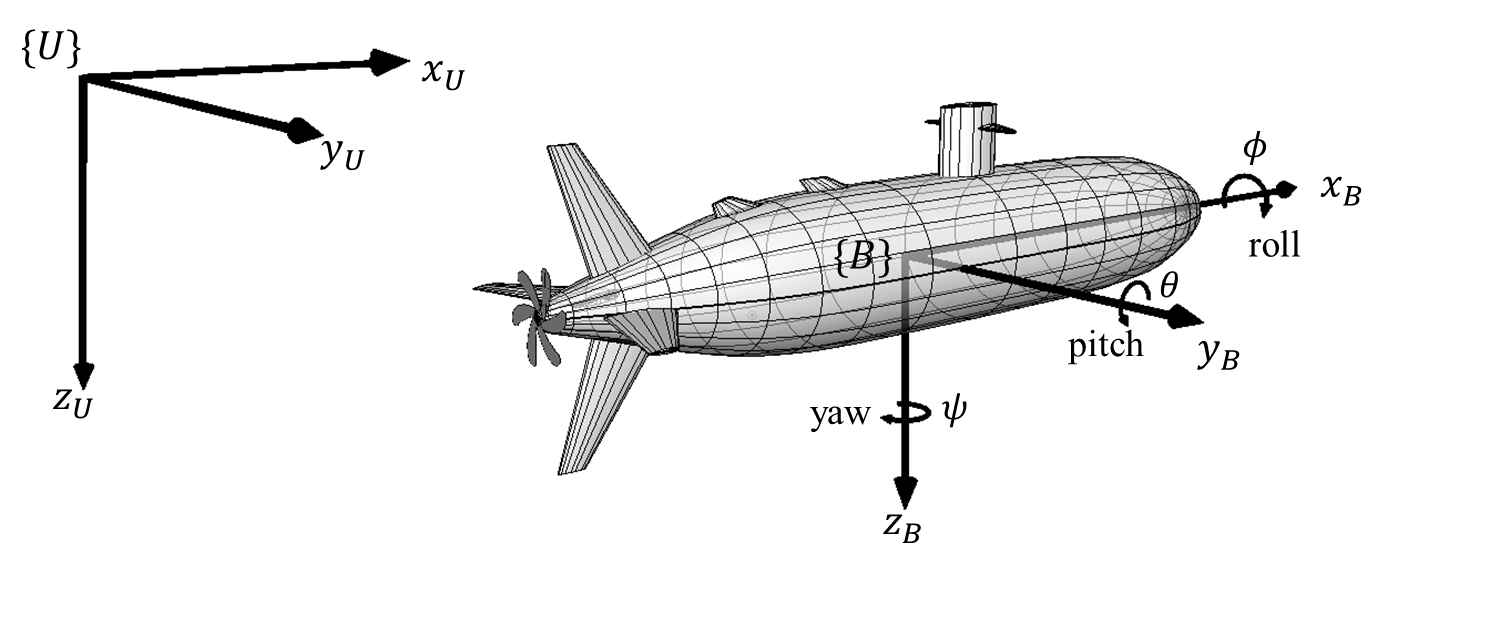

Fig. 1. Coordinate frames, position and orientation variables of an AUV.


Consider an Autonomous Underwater Vehicle (AUV) illustrated in Fig. 1 that can only generate force in $x_B$-direction by means of an actuator composed of an electric motor with a propeller coupled to the shaft.

In this work, the final goal is to design a tracking controller in the vertical plane so that that the vehicle will move according to a desired depth trajectory.


In the vertical plane, the kinematic equations take the form

\begin{align}
 \dot x &= u\cos \theta  + w\sin \theta  \\
 \dot z &=  - u\sin \theta  + w\cos \theta  \\
 \dot \theta  &= q
\end{align}

where $u$, $w$ and $q$ are the linear and angular velocities of the  vehicle, respectively, in surge ($x_B$), heave ($z_B$) and pitch ($\theta$) direction of the body-fixed coordinates $\{B\}$. The Cartesian coordinates of the vehicle's center of mass is denoted by $x$ and $z$, and $\theta$ is the pitch angle.

The simplified equations of motion for surge, heave, and pitch rate when there is no actuated force in $Z_B$ direction (that is, the vehicle is underactuated) yield

\begin{align}
{m_u}\dot u + {m_w}wq + {d_u}(u)u &= \tau_u \\
{m_w}\dot w - {m_u}uq + {d_w}(w)w &= 0 \\
{m_q}\dot q + {m_{uw}}uw + {d_q}(q)q - z_BB\sin\theta &= \tau_q
\end{align}

where $m_u=m-X_{\dot{u}}$, $m_w=m-Z_{\dot{w}}$, $m_q=I_y-M_{\dot q}$ and $m_{uw}=m_u-m_w$ are mass and hydrodynamic added mass terms, $B$ denotes the buoyancy, and the hydrodynamic damping effects are considered to be of the form

\begin{align}
d_u(u) &=-X_u-X_{u|u|}|u| \\
d_w(w) &=-Z_w-Z_{w|w|}|w| \\
d_q(q) &=-M_q-M_{q|q|}|q|
\end{align}


In the above equations, it is assumed that the AUV is neutrally buoyant and that the center of buoyancy can be expressed as $(x_B, y_B, z_B) = (0,0, z_B)$, where $z_B$ is the metacentric height.
The symbols $\tau_u$ and $\tau_q$ denote the actuated force in surge direction and  torque around the $y$-axis of the vehicle, respectively.



# **Part 1: Stability analysis**



We take the practical situation that there exist autopilots controllers in charge of tracking reference signals in $u$ and $q$. Thus, we consider at this stage that the actuation signals are $u$ and $q$.

**1.1** Show that the speed controller given by

\begin{equation}
u = \frac{{{v_d} - w\sin \theta }}{{\cos \theta }}
\end{equation}

forces the AUV to move with a constant horizontal velocity $v_d$, that is, $\dot x = v_d$. Show also that in this case the equations of motion in the vertical plane of the AUV  reduces to

$\color{blue}{AUV\ model}$

\begin{align*}
\dot x &= v_d \\
\dot z &= - v_d \tan\theta + \frac{1}{\cos\theta}w \\
\dot w &=d_1 w + d_2 w|w| + \bar m \left(\frac{v_d}{\cos\theta} - w\tan\theta\right)q \\
\dot\theta &= q
\end{align*}

where $z$ is the vertical position (depth) of the AUV, $w$ is the linear velocity along the axis $z_B$ (*heave*), $\theta$ is the angle of *pitch*, and $q$ is the angular velocity around the axis $y_B$.


In the sequel, we will consider that system parameters have the following values (in appropriate units):
$v_d = 1$; $d_1= -3$; $d_2 = -12$, $\bar m = 0.9$

Let's substitute $u$ for the given expression:

\begin{align*}
 u &=  \frac{v_d-wsin \theta}{cos\theta} \\
 \dot x &=  \frac{v_d-wsin \theta}{cos\theta} cos(\theta) +\omega sin(\theta) = v_d \\
 \dot z &= -\frac{v_d-wsin \theta}{cos\theta} sin(\theta) +\omega cos(\theta) = -v_dtan(\theta)+ w \frac{(sin^2(\theta) + cos^2(\theta))}{cos(\theta)} \\ &= -v_dtan(\theta) + \frac{1}{cos(\theta)} \\
\dot w &= \bar muq + (d_1 + d_2|\omega|)ω = \bar mq\frac{v_d-wsin \theta}{cos\theta} + (d_1 + d_2|\omega|)ω \\ &= (d_1 + d_2|\omega|)ω + \bar m(\frac{v_d}{cos(\theta)} - \omega tan(\theta))q \\
\dot\theta &= q
\end{align*}

**1.2.**
Let $z_d$ be a given desired depth. Defining the state ${\bf x} = (z-z_d,w,\theta)^⊤$, input ${\bf u}=q$, output ${\bf y}=z-z_d$, write the system in state-space form and linearize it around the origin ${\bf x=0}$.

$ \dot{\bf x}= \begin{bmatrix}
-v_dtan(\theta) + \frac{1}{cos(\theta)} -\dot z_d \\
(d_1 + d_2|\omega|)ω + \bar m(\frac{v_d}{cos(\theta)} - \omega tan(\theta))q \\
q
\end{bmatrix} $

\\

$ A = \begin{bmatrix}
0 & \frac{1}{\cos(\theta)} & \frac{\omega\sin(\theta)-v_d}{\cos^2(\theta)}\\
0 & d_1+d_2(ω)-\bar mq\tan(\theta) & \frac{\bar mv_d\sin(\theta)-ωq}{\cos^2(\theta)}\\
0 & 0 & 0
\end{bmatrix} $

\\


$ B= \begin{bmatrix}
0 \\
\bar m (\frac{v_d}{cos \theta} - \omega tan \theta) \\
1
\end{bmatrix} $

$ C = \begin{bmatrix}
1 & 0 & 0
\end{bmatrix} $

$D = 0$


**1.3.**
Analyze the stability of the origin ${\bf x = 0}$ with ${\bf u=0}$ of the linear and nonlinear system using the **Lyapunov indirect method**.



\\
Let $λ_i$ be the eigenvalues of $A$ at $x = 0$, if $λ_i < 0, i \in {1,2,3}$, then the system system origin's is stable.

In [ ]:
import numpy as np
from numpy import linalg as LA

vd = 1
d1 = -3
d2 = -12

A = np.matrix([[0, 1, -vd],[0, d1, 0],[0, 0, 0]])

eigvalues, eigvectors = LA.eig(A)

if eigvalues.item(0) < 0 and eigvalues.item(1) < 0 and eigvalues.item(2) < 0:
  print("The origin is stable")
elif eigvalues.item(0) == 0 or eigvalues.item(1) == 0 or eigvalues.item(2) == 0:
  print("The origin is not guaranteed to be stable")
else:
  print("The origin is not stable")

print(eigvalues)


The origin is not guaranteed to be stable
[ 0. -3.  0.]


**1.4**
For $z_d = 1\,m$, plot the **time-evolution** of the state for the nonlinear and linear systems (with $q=0$) for different initial conditions.

Use the numerical integrator `integrate.odeint` of `scipy`.

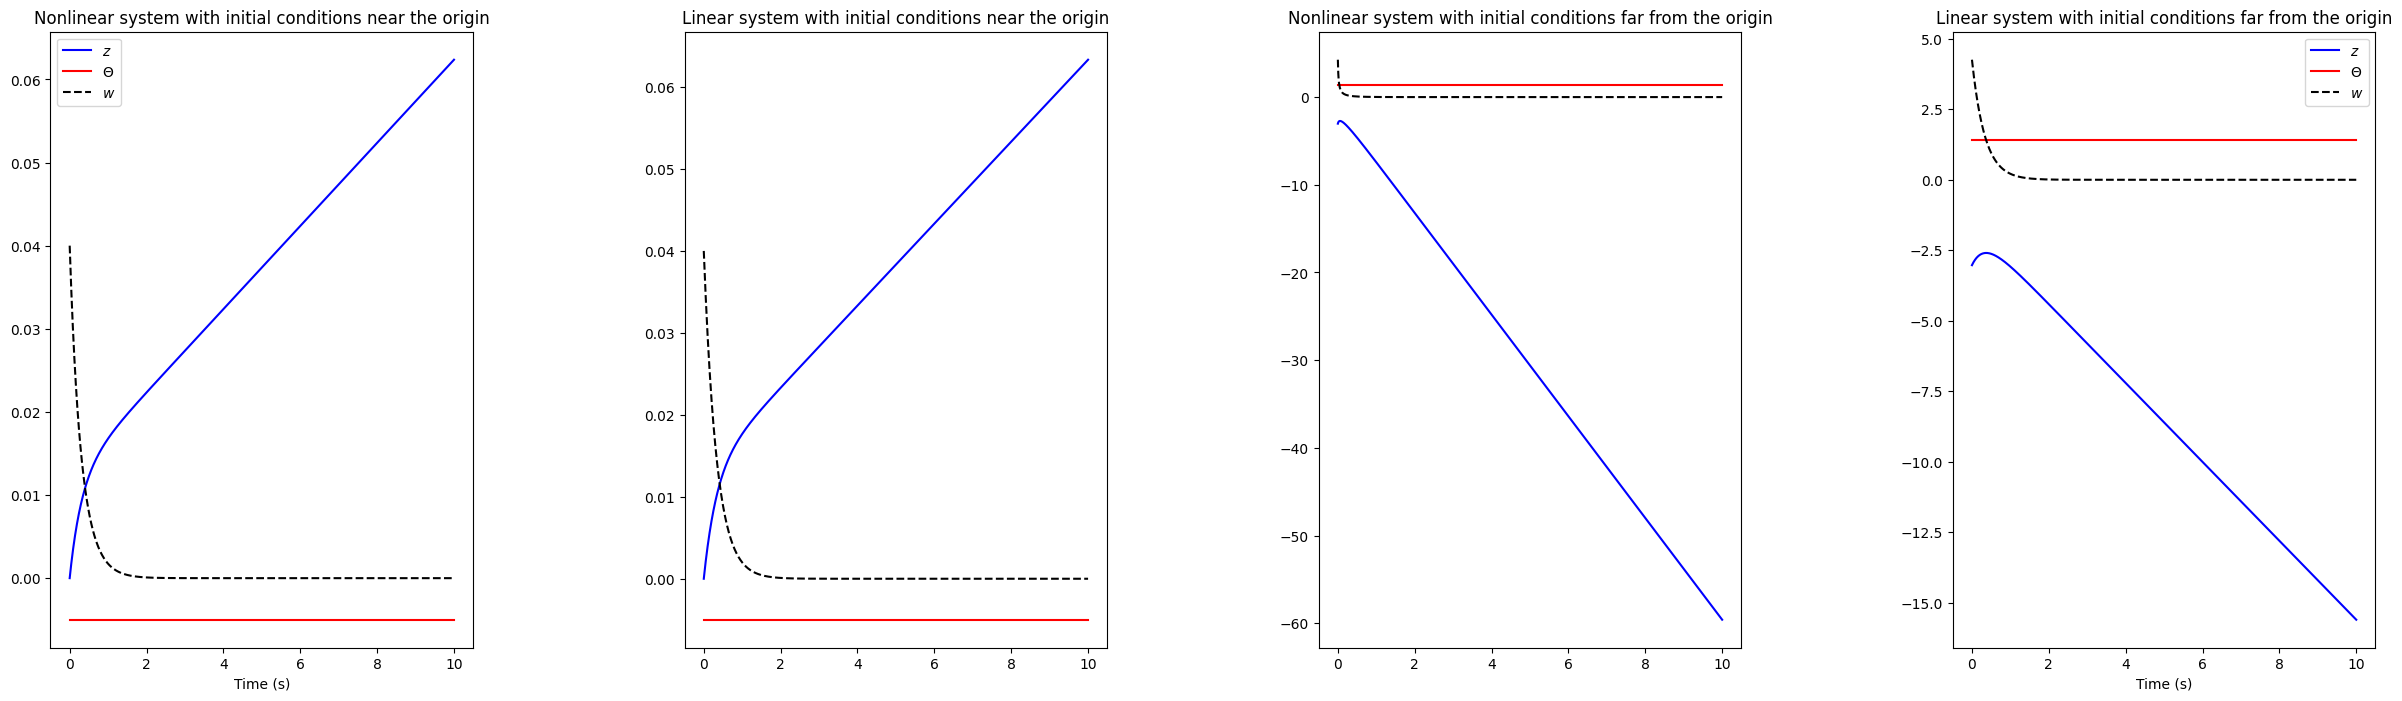

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

v_d = 1
d_1 = -3
d_2 = -12
m_ = 0.9
z_d = 1

#y: 0-x,1-z,2-w,3-theta
def nonlinearsystem(y,t):
  q = 0
  dx = v_d
  dz = - v_d * np.tan(y[3]) + 1 / np.cos(y[3]) * y[2]
  dw = d_1 * y[2] + d_2 * y[2] * abs(y[2]) + m_ * q * (v_d/np.cos(y[3]) - y[2] * np.tan(y[3]))
  dtheta = q

  return [dx,dz,dw,dtheta]

def linearsystem(y,t):
  q = 0
  dx = vd
  dz = A.item(0) * (y[1] - z_d) + A.item(1) * y[2] + A.item(2) * y[3]
  dw = A.item(3) * (y[1] - z_d) + A.item(4) * y[2] + A.item(5) * y[3]
  dtheta =  A.item(6) * (y[1] - z_d) + A.item(7) * y[2] + A.item(8) * y[3] + q

  return [dx,dz,dw,dtheta]




t = np.linspace(0, 10, 1000)

#initial parameters z,theta = ....
y0 = [0.00, 0, 0.04, -0.005]

y1 = [.21, -3.03, 4.26, 1.4]


sol = odeint(nonlinearsystem,y0,t) #nonlinear near origin
x, z, w, theta = sol[:, 0], sol[:, 1], sol[:,2], sol[:,3]

sol2 = odeint(linearsystem,y0,t) #linear near origin
x2, z2, w2, theta2 = sol2[:, 0], sol2[:, 1], sol2[:,2], sol2[:,3]

sol3 = odeint(nonlinearsystem,y1,t) #nonlinear near origin
x3, z3, w3, theta3 = sol3[:, 0], sol3[:, 1], sol3[:,2], sol3[:,3]

sol4 = odeint(linearsystem,y1,t) #linear near origin
x4, z4, w4, theta4 = sol4[:, 0], sol4[:, 1], sol4[:,2], sol4[:,3]



fig0 = plt.figure(figsize = (30, 8))
fig0.subplots_adjust(wspace = 0.5, hspace = 0.3)

ax1 = fig0.add_subplot(1,4,1)
ax2 = fig0.add_subplot(1,4,2)
ax3 = fig0.add_subplot(1,4,3)
ax4 = fig0.add_subplot(1,4,4)


#plt.figure(figsize=(10, 5))
ax1.plot(t, z, 'b-', label='$z$')
ax1.plot(t, theta, 'r-', label='$\Theta$')
ax1.plot(t, w, 'k--', label ='$w$')

ax2.plot(t, z2, 'b-', label='$z$')
ax2.plot(t, theta2, 'r-', label='$\Theta$')
ax2.plot(t, w2, 'k--', label ='$w$')

ax3.plot(t, z3, 'b-', label='$z$')
ax3.plot(t, theta3, 'r-', label='$\Theta$')
ax3.plot(t, w3, 'k--', label ='$w$')

ax4.plot(t, z4, 'b-', label='$z$')
ax4.plot(t, theta4, 'r-', label='$\Theta$')
ax4.plot(t, w4, 'k--', label ='$w$')

ax1.set_title('Nonlinear system with initial conditions near the origin')
ax2.set_title('Linear system with initial conditions near the origin')
ax3.set_title('Nonlinear system with initial conditions far from the origin')
ax4.set_title('Linear system with initial conditions far from the origin')

ax1.set_xlabel('Time (s)')

lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines1, labels1)

plt.xlabel('Time (s)')
plt.legend()
plt.show()


# plt.plot(y)
# plt.plot(w, label= 'w')
plt.show()

We can note that $z$ does not stabilize, which is not unexpected since we could  not prove (1.3) that the system's origin is stable. However, we can verify that both systems (linear and non linear) have the same behaviour when the initial conditions approach the origin, which is expected.
It is also expected that the systems behave differently when the initial conditions are not near the origin, which can also be confirmed by the plots

**1.5**
Consider now the nonlinear subsystem $(\tilde z, \theta)$ with $\tilde z = z-z_d$, $q$ as input and assume that $w=0$.

Prove that the origin of the closed-loop system with control law
\begin{equation}
q = k_1 (z-z_d) - k_2 \theta \tag{1}
\end{equation}
with positive gains $k_1$ and $k_2$ (and $v_d>0$) is asymptotically stable. \\
Use the Lyapunov function
\begin{equation}
V(\tilde z, \theta) = \frac{k_1}{2 v_d}\tilde z^2+\int_0^\theta \tan(\phi)d\phi
\end{equation}


$\dot V = \frac{k_1}{v_d} \dot {\tilde z} \tilde z + \tan(\theta)\dot \theta$


$ \dot V = \frac{k_1}{v_d}\tilde z(-v_d \tan(\theta)) + \tan(\theta)\dot \theta$

$\dot V = -\tilde z k_1\tan(\theta) +(k_1\tilde z -k_2\theta)\tan (\theta)$

$\dot V =-k_2\theta\tan (\theta)$

Since:

$V(0) = 0, V(\tilde z,\theta) > 0,  ∀   \: \: \tilde z, \theta \in D\setminus{\{0\}} $



$D$ is the set of $\tilde z$ and $\theta$, where: $\tilde z \in [-∞;+∞]$, and $\theta \in [-π/2;π/2]$


$ \dot V(\tilde z,\theta) < 0, ∀ \: \tilde z,\theta \in D\setminus{\{0\}}$




Then, we can confirm that the origin is asymptotically stable.




**1.6**
For the above item, confirm the results through simulation by plotting the **time-evolution** of the state and in the **phase space** for different initial conditions with $k_1=k_2=1$.

(1000, 4)
<class 'numpy.ndarray'>


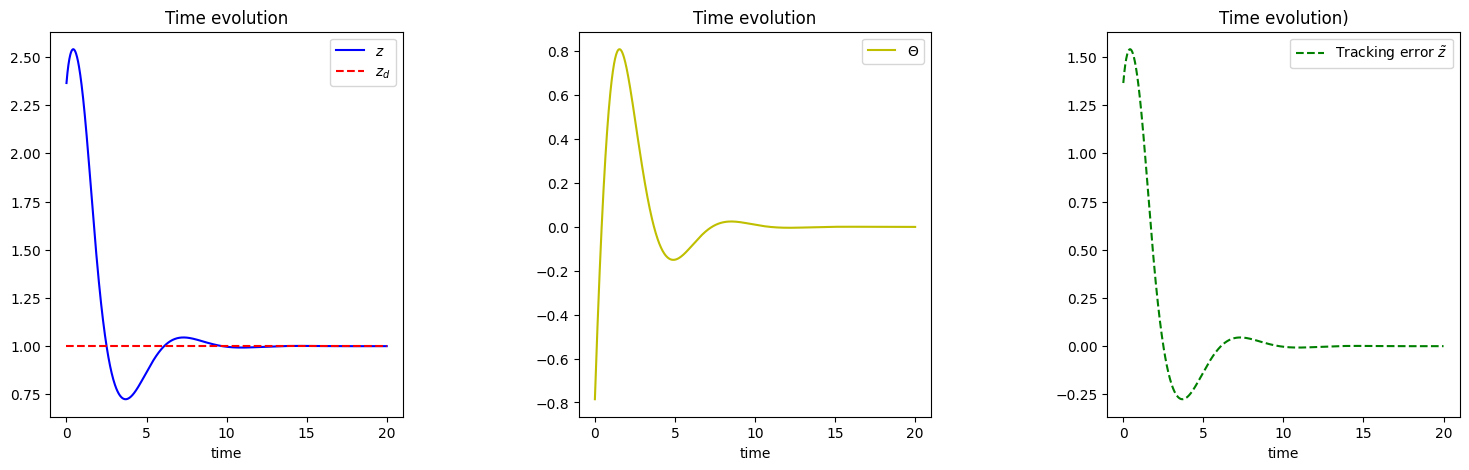

In [ ]:
from scipy import integrate
k1 = 1
k2 = 1

def z_d_signal(t):

    return 1
# def subsystem (z, t):
#   z_til, theta = z
#   q = k1*(z_til - z_d) - k2*theta
#   dz_til = - v_d*np.tan(theta) - dz_d
#   dtheta = q
#   return [dz_til, dtheta]

#y: 0-x,1-z,2-w,3-theta
def Sys_f(y, t=0):
  z_d = z_d_signal(t)
  q = k1*(y[1]-z_d)-k2*y[3]
  dx = v_d
  dz = - v_d * np.tan(y[3]) + 1 / np.cos(y[3]) * 0    #*y[2] ?
  dw = d_1 * y[2] + d_2 * y[2] * abs(y[2]) + m_ * q * (v_d/np.cos(y[3]) - y[2] * np.tan(y[3]))
  dtheta = q

  return [dx,dz,dw,dtheta]

t = np.linspace(0, 20, 1000)
y0=[0, 2.365, -.68, -3.1415/4]

z_d_values = np.vectorize(z_d_signal)(t)

y, infodict = integrate.odeint(Sys_f, y0, t, full_output=True)
print(y.shape)
print(type(y))
x, z, w, theta = y.T

tracking_error = np.zeros(len(t))

for i in range (len(t)):
  tracking_error[i] = z[i] - z_d_values[i] #ztilde

fig1 = plt.figure(figsize = (25, 5))
fig1.subplots_adjust(wspace = 0.5, hspace = 0.3)

#ax1 = fig1.add_subplot(1,4,1)
ax2 = fig1.add_subplot(1,4,1)
ax3 = fig1.add_subplot(1,4,3)
ax4 = fig1.add_subplot(1,4,2)

# ax1.plot(t, x, 'r-',label='$x')
# ax1.set_title('Time evolution')
# ax1.set_xlabel('time')

ax2.plot(t, z, 'b-', label = "$z$")
ax2.plot(t,z_d_values,'r--', label = "$z_d$")
ax2.set_title('Time evolution')
ax2.set_xlabel('time')

lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines2, labels2)
# lines1, labels1 = ax1.get_legend_handles_labels()
# ax1.legend(lines1, labels1)

ax3.plot(t, tracking_error, 'g--',label = r'Tracking error $ \tilde{z} $')
ax3.set_title('Time evolution)')
ax3.set_xlabel('time')

ax4.plot(t, theta, 'y-',label = '$\Theta$')
ax4.set_title('Time evolution')
ax4.set_xlabel('time')

lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines3, labels3)
lines4, labels4 = ax4.get_legend_handles_labels()
ax4.legend(lines4, labels4)


fig2 = plt.figure(figsize = (15, 5))
fig2.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig2.add_subplot(1,2,1)
#ax2 = fig2.add_subplot(1,2,2)


ax1.plot(tracking_error,theta, 'r-')
ax1.set_title('Phase space')
ax1.set_xlabel(r'$\tilde{z}$')
ax1.set_ylabel('$\Theta$')


# ax2.plot(w,theta, 'b-', label='$w$')
# ax2.set_xlabel('w')
# ax2.set_ylabel('theta')

plt.show()

**1.7**
Consider now the $\color{blue}{AUV\ model}$ $(x,z,w,\theta)$ in closed-loop with the control law (1).
Plot the **time-evolution** of the state  for different initial conditions.

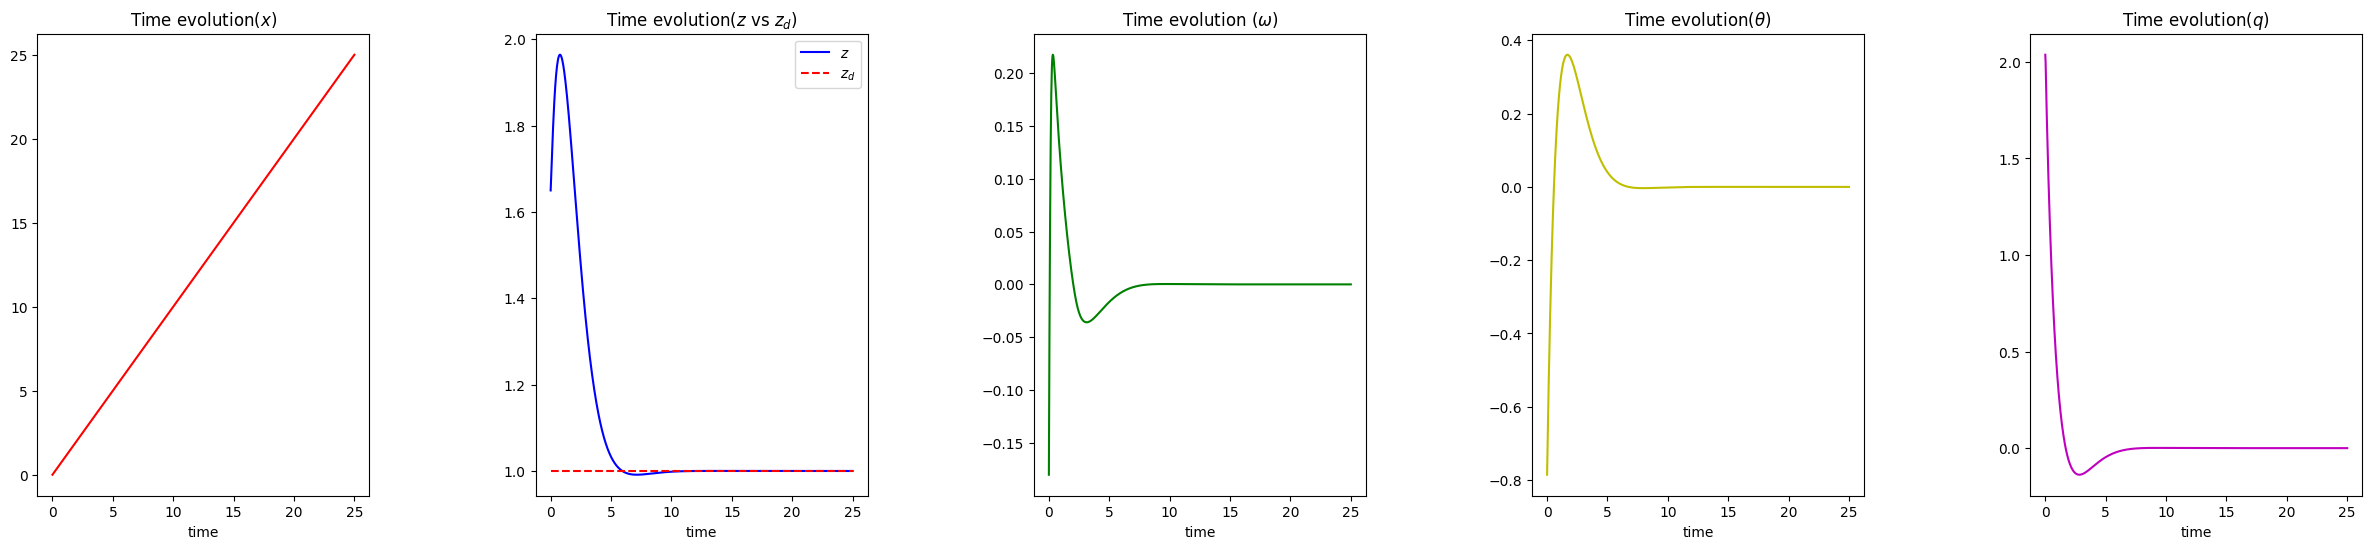

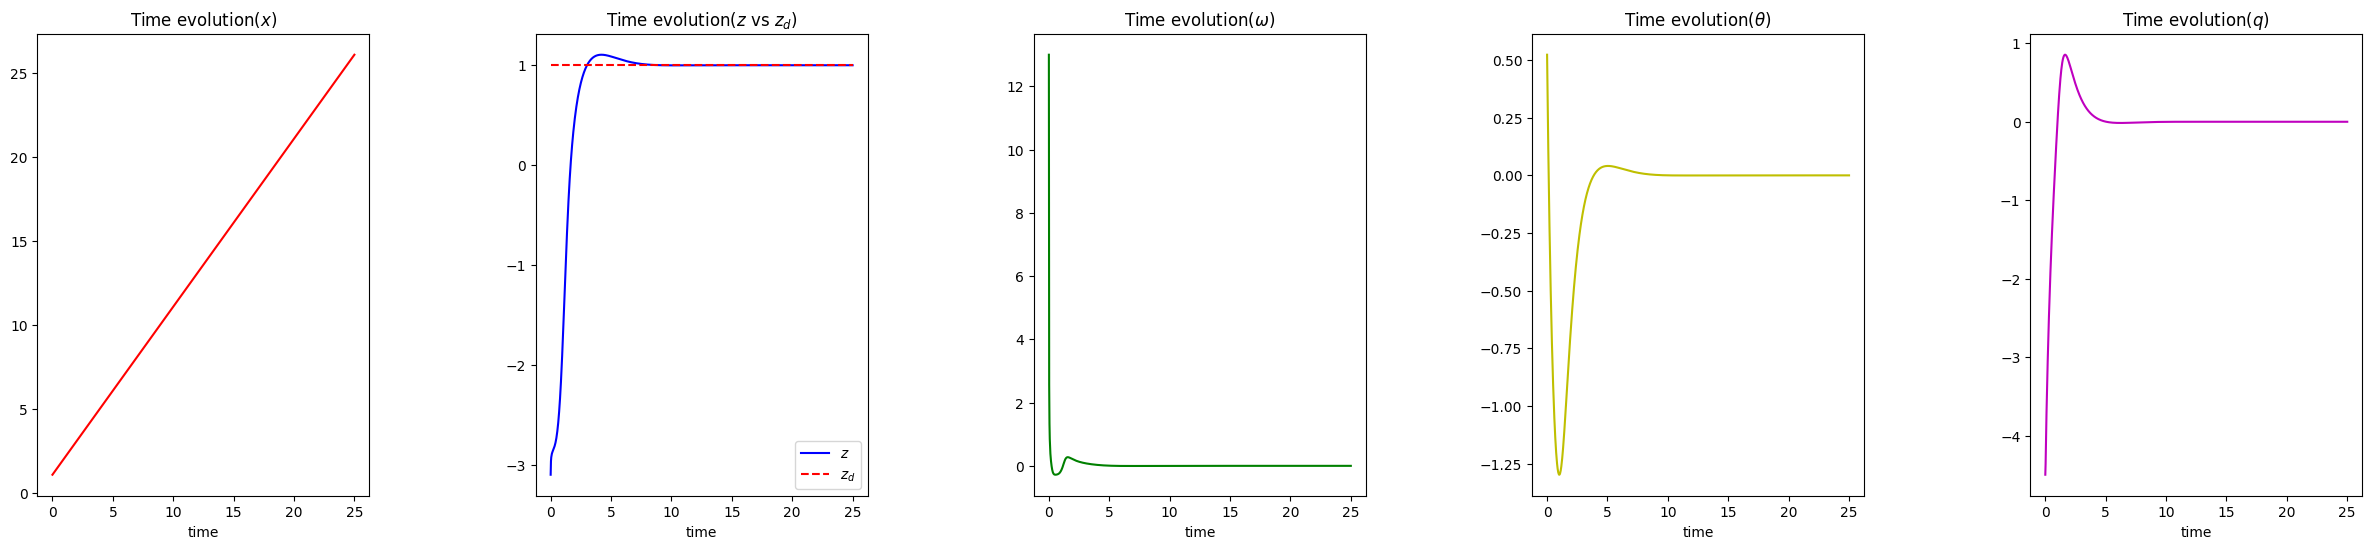

In [ ]:
k1 = 0.9
k2 = 1.9

def z_d_signal(t):

  return z_d

#print (z_d[4])
# def subsystem (z, t):
#   z_til, theta = z
#   q = k1*(z_til - z_d) - k2*theta
#   dz_til = - v_d*np.tan(theta) - dz_d
#   dtheta = q
#   return [dz_til, dtheta]

#y: 0-x,1-z,2-w,3-theta
def Sys_f(y, t):
  z_d = z_d_signal(t)
  q = k1*(y[1]-z_d)-k2*y[3]
  dx = v_d
  dz = - v_d * np.tan(y[3]) + 1 / np.cos(y[3]) * y[2]
  dw = d_1 * y[2] + d_2 * y[2] * abs(y[2]) + m_ * q * (v_d/np.cos(y[3]) - y[2] * np.tan(y[3]))
  dtheta = q

  return [dx,dz,dw,dtheta]

t = np.linspace(0, 25, 1000)
y0=[0, 1.65, -.18, -3.1415/4]
y1=[1.1, -3.1, 13, 3.14/6]

y, infodict = integrate.odeint(Sys_f, y0, t, full_output=True)
y2, infodict = integrate.odeint(Sys_f, y1, t, full_output=True)
# print(y.shape)
# print(type(y))
x, z, w, theta = y.T
x2, z2, w2, theta2 = y2.T

z_d_values = np.vectorize(z_d_signal)(t)

dt = t[1] - t[0]

q1 = np.gradient(theta, dt)
q2 = np.gradient(theta2, dt)

fig1 = plt.figure(figsize = (30, 6))
fig1.subplots_adjust(wspace = 0.5, hspace = 0.3)

fig5 = plt.figure(figsize = (30, 6))
fig5.subplots_adjust(wspace = 0.5, hspace = 0.3)

ax1 = fig1.add_subplot(1,5,1)
ax2 = fig1.add_subplot(1,5,2)
ax3 = fig1.add_subplot(1,5,3)
ax4 = fig1.add_subplot(1,5,4)
ax9 = fig1.add_subplot(1,5,5)

ax5 = fig5.add_subplot(1,5,1)
ax6 = fig5.add_subplot(1,5,2)
ax7 = fig5.add_subplot(1,5,3)
ax8 = fig5.add_subplot(1,5,4)
ax10 = fig5.add_subplot(1,5,5)

ax1.plot(t, x, 'r-')
ax1.set_title('Time evolution($x$)')
ax1.set_xlabel('time')

ax2.plot(t, z, 'b-',label = '$z$')
ax2.plot(t,z_d_values,'r--',label = '$z_d$')
ax2.set_title('Time evolution($z$ vs $z_d$)')
ax2.set_xlabel('time')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines2, labels2)

ax3.plot(t, w, 'g-')
ax3.set_title('Time evolution ($\omega$)')
ax3.set_xlabel('time')

ax4.plot(t, theta, 'y-')
ax4.set_title(r'Time evolution($\theta$)')
ax4.set_xlabel('time')

ax5.plot(t, x2, 'r-')
ax5.set_title('Time evolution($x$)')
ax5.set_xlabel('time')

ax6.plot(t, z2, 'b-',label = '$z$')
ax6.plot(t,z_d_values,'r--',label = '$z_d$')
ax6.set_title('Time evolution($z$ vs $z_d$)')
ax6.set_xlabel('time')

ax6.legend(lines2, labels2)

ax7.plot(t, w2, 'g-')
ax7.set_title('Time evolution($\omega$)')
ax7.set_xlabel('time')

ax8.plot(t, theta2, 'y-')
ax8.set_title(r'Time evolution($\theta$)')
ax8.set_xlabel('time')

ax9.plot(t,q1,'m-')
ax9.set_title(r'Time evolution($q$)')
ax9.set_xlabel('time')

ax10.plot(t,q2,'m-')
ax10.set_title(r'Time evolution($q$)')
ax10.set_xlabel('time')


plt.show()

System response to different initial conditions

# **Part 2: Control Design**



**2.1**
Consider now the nonlinear subsystem $(\tilde z, \theta)$ with $\tilde z = z-z_d$, where $z_d$ is a constant desired depth.
Assuming $q$ as input and $w=0$, design a **Backstepping** Lyapunov based feedback law such that $z(t)$ converges to $z_d$ as $t\to\infty$ and the tracking error system at the origin is AS.

To this end, in the first step of the methodology assume that the **virtual control signal** is $\tan(\theta)$ (and not $\theta$).




$\phi = k \tilde z $


$\sigma = \tan(\theta) - \phi =$


$\tan(\theta) = \sigma + k\tilde z$

Defining the Lyapunov functions as:
\begin{align*}
     V_1 &= \frac{1}{2}\tilde z^2 \\
V_2 &= V_1 + \frac{1}{2}σ^2  \\
\end{align*}


Then,

\begin{align*}
    \dot V_1 &= \tilde z \dot {\tilde z} = \tilde z (-v_d \tan(\theta)) \\
\dot V_2 &= \dot V_1 + σ\dot σ \\
\end{align*}


\\


(Here we will use $\dot{\tilde z} = -v_d\tan(\theta) - \dot z_d$.
Since it's only asked to simulate the system for a constant $z_d$, we can ignore $\dot z_d$, however, we will keep considering this value, since this allows our system to be more versatile, working for both a constant and non-constant $z_d$.)

Expanding $\dot V_2$:

\begin{align*}
  \dot V_2 &= \tilde z(-v_d(σ + k \tilde z)) + σ(sec^2(\theta)q - k \tilde z \dot{\tilde z}) \\
  &= -v_d k \tilde z^2 + \sigma(sec^2(\theta)q + k \tilde z v_d \tan(\theta) - v_d\tilde z + k \tilde z \dot z_d)   \\
\\
\end{align*}

From here:


\begin{align*}
  -k_2 \sigma &= sec^2(\theta)q + k \tilde z v_d \tan(\theta) - v_d\tilde z + k \tilde z \dot z_d  \\
  q &= \frac{-k_2 \sigma - k \tilde z v_d \tan(\theta) + v_d \tilde z -k \tilde z \dot z_d}{sec^2(\theta)}
\\
\end{align*}

Now, we will confirm the results by plotting the time evolution for both constant and non constant $z_d$

**2.2**
Confirm the results through simulation by plotting the **time-evolution** of the state $z(t)$, the tracking error $\tilde z(t)$, the pitch angle $\theta$ and the input signal $q$.

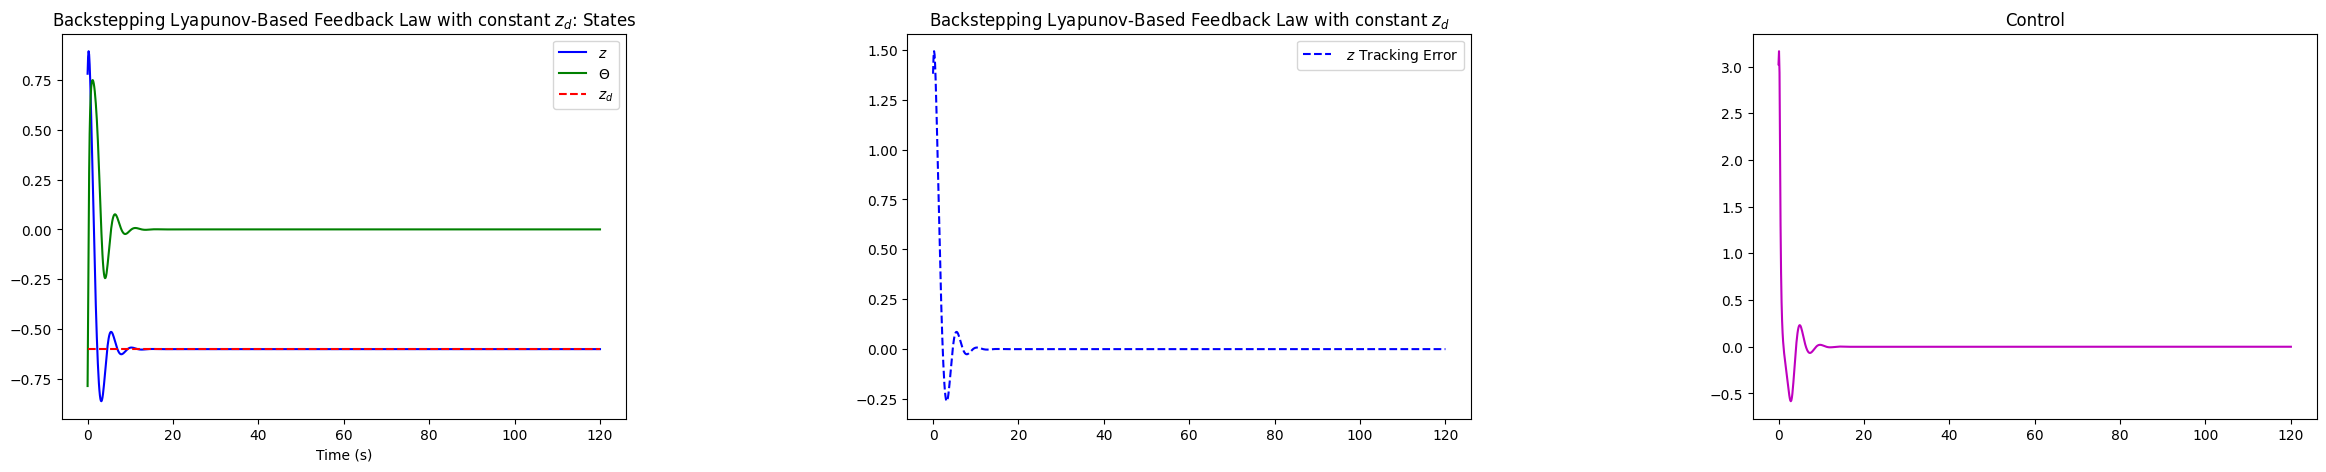

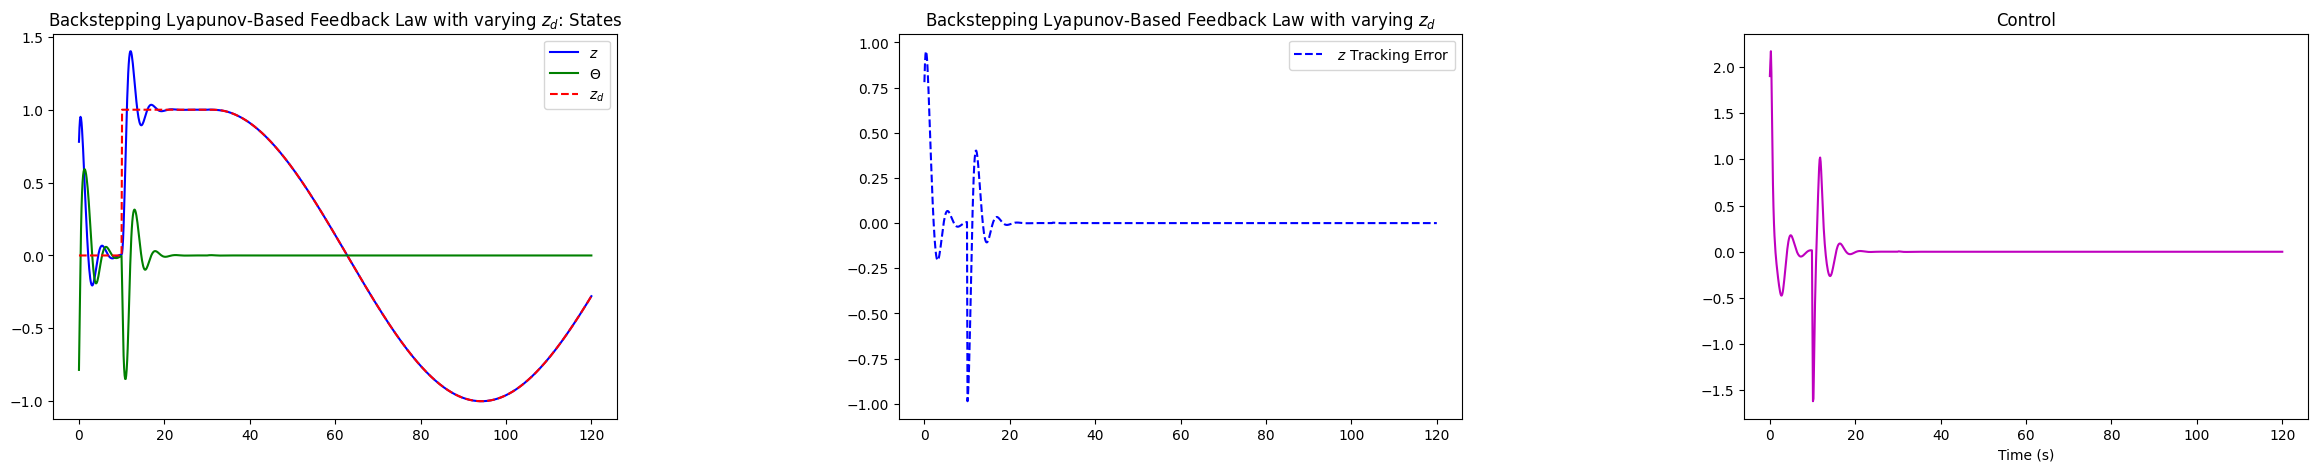

In [ ]:
#versao 4 VERSAO FINAL 2.2
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def z_d_signal_cte(t):
  return -0.6

def z_d_signal_varying(t):
  if t < 10:
    return 0
  elif t >= 10 and t < 30:
    return 1
  elif t >= 30:
    return np.sin(0.05*t)

def z_d_dot(t):
  if t < 10:
    return 0
  elif t >= 10 and t < 30:
    return 0
  elif t >= 30:
    return np.cos(0.05*t) * 0.05

def step_f_4_cte(y, t):
    k1 = 1
    k2 = 1
    v_d = 1
    z_d = z_d_signal_cte(t)
    sigma=np.tan(y[3]) - k1*(y[1]-z_d)


    q = (-sigma * k1 - k1*(y[1] - z_d)*v_d*np.tan(y[3]) + v_d*(y[1]-z_d) )*np.cos(y[3])**2
    dx = v_d
    dz = - v_d * np.tan(y[3])
    dw = d_1 * y[2] + d_2 * y[2] * abs(y[2]) + m_ * q * (v_d/np.cos(y[3]) - y[2] * np.tan(y[3]))
    dtheta = q

    return [dx,dz,dw,dtheta]

def step_f_4_noncte(y, t):
  k1 = 1
  k2 = 1
  v_d = 1
  z_d = z_d_signal_varying(t)
  sigma=np.tan(y[3]) - k1*(y[1]-z_d)
  z_ddot = z_d_dot(t)


  q = (-sigma * k1 - k1*(y[1] - z_d)*v_d*np.tan(y[3]) + v_d*(y[1]-z_d) - k1*(y[1] - z_d)*z_ddot )*np.cos(y[3])**2
  dx = v_d
  dz = - v_d * np.tan(y[3]) + z_ddot
  dw = d_1 * y[2] + d_2 * y[2] * abs(y[2]) + m_ * q * (v_d/np.cos(y[3]) - y[2] * np.tan(y[3]))
  dtheta = q

  return [dx,dz,dw,dtheta]


t = np.linspace(0, 120, 1000)
y0 = [0, 0.78, 0, -3.14/4]  # z, theta
y = odeint(step_f_4_cte, y0, t)
x,z,w, theta = y.T

y = odeint(step_f_4_noncte, y0, t)
x1,z1,w1, theta1 = y.T

tracking_error_cte = np.ones(len(t))
tracking_error_ncte = np.ones(len(t))

z_d_values = np.vectorize(z_d_signal_cte)(t)
#z_d_value_ncte = np.vectorize(z_d_signal_varying)(t)
z_d_value_ncte = [z_d_signal_varying(i) for i in t]


for i in range (len(t)):
  tracking_error_cte[i] = z[i] - z_d_values[i]
  tracking_error_ncte[i] = z1[i] - z_d_value_ncte[i]


dt = t[1] - t[0]

q1 = np.gradient(theta, dt)
q2 = np.gradient(theta1, dt)


fig10 = plt.figure(figsize = (40, 5))
fig10.subplots_adjust(wspace = 0.5, hspace = 0.3)
fig11 = plt.figure(figsize = (40, 5))
fig11.subplots_adjust(wspace = 0.5, hspace = 0.3)


ax1 = fig10.add_subplot(1,4,1)
ax2 = fig10.add_subplot(1,4,2)
ax5 = fig10.add_subplot(1,4,3)

ax3 = fig11.add_subplot(1,4,1)
ax4 = fig11.add_subplot(1,4,2)
ax6 = fig11.add_subplot(1,4,3)

#plt.figure(figsize=(10, 5))
ax1.plot(t, z, 'b-', label='$z$')
ax1.plot(t, theta, 'g-', label='$\Theta$')
ax2.plot(t, tracking_error_cte, 'b--',label=' $z$ Tracking Error')
ax1.plot(t,z_d_values,'r--',label='$z_d$')
ax1.set_title('Backstepping Lyapunov-Based Feedback Law with constant $z_d$: States')
ax2.set_title('Backstepping Lyapunov-Based Feedback Law with constant $z_d$')
ax5.plot(t,q1,'m-')
ax5.set_title('Control with constant $z_d$')

ax3.plot(t, z1, 'b-', label='$z$')
ax3.plot(t, theta1, 'g-', label='$\Theta$')
ax4.plot(t, tracking_error_ncte, 'b--',label=' $z$ Tracking Error')
ax3.plot(t,z_d_value_ncte,'r--',label='$z_d$')
ax6.plot(t,q2,'m-')
ax6.set_title('Control with varying $z_d$')
ax3.set_title('Backstepping Lyapunov-Based Feedback Law with varying $z_d$: States')
ax4.set_title('Backstepping Lyapunov-Based Feedback Law with varying $z_d$')


ax1.set_xlabel('Time (s)')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1, labels1)
ax3.legend(lines1, labels1)
ax2.legend(lines2, labels2)
ax4.legend(lines2, labels2)



plt.xlabel('Time (s)')
plt.show()


# plt.figure(figsize=(10, 5))
# plt.plot(t, z, 'b-', label='z')
# plt.plot(t, theta, 'g-', label='$\Theta$')
# plt.plot(t, z_d_values, 'r--', label='z_d')
# plt.xlabel('Time')
# plt.ylabel('z')
# plt.legend()
# plt.title('Backstepping Lyapunov-Based Feedback Law for constant z_d')
# plt.show()

# plt.figure(figsize=(10, 5))
# plt.plot(t, z1, 'b-', label='z')
# plt.plot(t, theta1, 'g-', label='$\Theta$')
# plt.plot(t, z_d_value_ncte, 'r--', label='z_d')
# plt.xlabel('Time')
# plt.ylabel('z')
# plt.legend()
# plt.title('Backstepping Lyapunov-Based Feedback Law for varying z_d')
# plt.show()


**2.3**
Consider now the $\color{blue}{AUV\ model}$ $(x,z,w,\theta)$ in closed-loop with the backstepping control law.
Plot the **time-evolution** of the state  for different initial conditions.


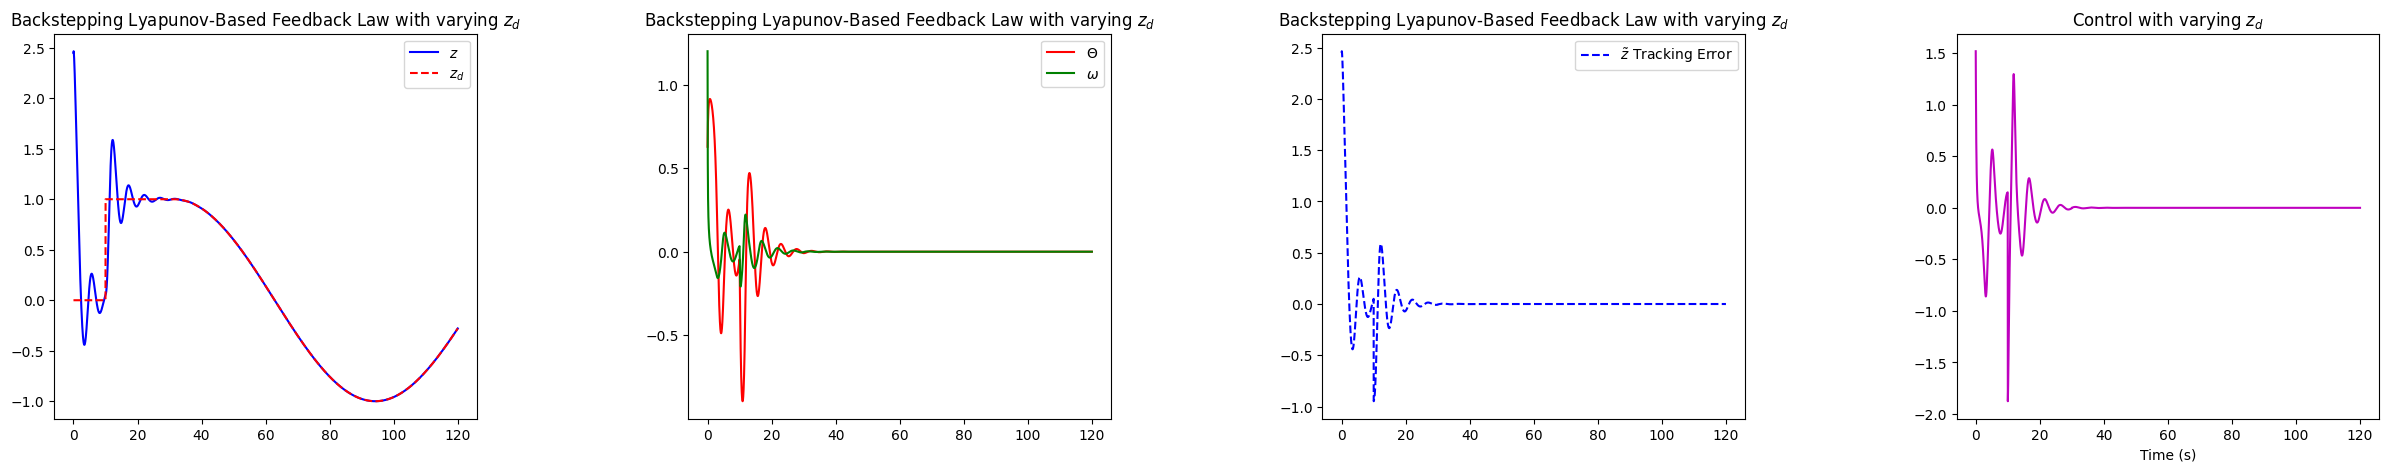

In [ ]:
#most recent versao final
def z_d_signal_cte(t):
  return -0.6

def z_d_signal_varying(t):
  if t < 10:
    return 0
  elif t >= 10 and t < 30:
    return 1
  elif t >= 30:
    return np.sin(0.05*t)

def z_d_dot(t):
  if t < 10:
    return 0
  elif t >= 10 and t < 30:
    return 0
  elif t >= 30:
    return np.cos(0.05*t) * 0.05



def step_fullsys_cte(y, t):
    k1 = 1
    k2 = 1
    v_d = 1
    z_d = z_d_signal_cte(t)
    sigma=np.tan(y[3]) - k1*(y[1]-z_d)

    q = (-sigma * k1 - k1*(y[1] - z_d)*v_d*np.tan(y[3]) + v_d*(y[1]-z_d))*np.cos(y[3])**2
    #q = (-k1*sigma + v_d*(y[1]-z_d) - k1*(y[1]-z_d)*v_d)*np.cos(y[3])**2
    dx = v_d
    dz = - v_d * np.tan(y[3]) + 1 / np.cos(y[3]) * y[2]
    dw = d_1 * y[2] + d_2 * y[2] * abs(y[2]) + m_ * q * (v_d/np.cos(y[3]) - y[2] * np.tan(y[3]))
    dtheta = q

    return [dx,dz,dw,dtheta]

def step_fullsys_v(y, t):
    k1 = 1
    k2 = 1
    v_d = 1
    z_d = z_d_signal_varying(t)
    z_ddot = z_d_dot(t)
    sigma=np.tan(y[3]) - k1*(y[1]-z_d)


    q = (-sigma * k1 - k1*(y[1] - z_d)*v_d*np.tan(y[3]) + v_d*(y[1]-z_d) - k1*(y[1] - z_d)*z_ddot )*np.cos(y[3])**2
    #q = (-k1*sigma + v_d*(y[1]-z_d) - k1*(y[1]-z_d)*v_d)*np.cos(y[3])**2
    dx = v_d
    dz = - v_d * np.tan(y[3]) + 1 / np.cos(y[3]) * y[2] + z_ddot
    dw = d_1 * y[2] + d_2 * y[2] * abs(y[2]) + m_ * q * (v_d/np.cos(y[3]) - y[2] * np.tan(y[3]))
    dtheta = q

    return [dx,dz,dw,dtheta]
t = np.linspace(0, 120, 10000)
y0 = [0, 2.45, 1.2, 3.14/5]  # z, theta
y = odeint(step_fullsys_cte, y0, t)
x,z,w, theta = y.T

y = odeint(step_fullsys_v, y0, t)
x2,z2,w2, theta2 = y.T



tracking_error_cte = np.zeros(len(t))
tracking_error_ncte = np.zeros(len(t))

# Plot


z_d_values = [z_d_signal_cte(i) for i in t]
z_d_valuesv = [z_d_signal_varying(i) for i in t]

for i in range (len(t)):
  tracking_error_cte[i] = z[i] - z_d_values[i]
  tracking_error_ncte[i] = z2[i] - z_d_valuesv[i]


dt = t[1] - t[0]

q1 = np.gradient(theta, dt)
q2 = np.gradient(theta2, dt)

fig2 = plt.figure(figsize = (30, 5))
fig2.subplots_adjust(wspace = 0.5, hspace = 0.3)

fig6 = plt.figure(figsize = (30, 5))
fig6.subplots_adjust(wspace = 0.5, hspace = 0.3)


ax1 = fig2.add_subplot(1,4,1)
ax2 = fig2.add_subplot(1,4,2)
ax5 = fig2.add_subplot(1,4,3)
ax8 = fig2.add_subplot(1,4,4)

ax3 = fig6.add_subplot(1,4,1)
ax4 = fig6.add_subplot(1,4,2)
ax6 = fig6.add_subplot(1,4,3)
ax9 = fig6.add_subplot(1,4,4)


#plt.figure(figsize=(10, 5))
ax1.plot(t, z, 'b-', label='$z$')
ax2.plot(t, theta, 'r-', label='$\Theta$')
ax2.plot(t, w, 'g-', label='$\omega$')
ax1.plot(t,z_d_values,'r--',label='$z_d$')
ax5.plot(t,tracking_error_cte,'b--',label=r'$\tilde z$ Tracking Error')
ax8.plot(t,q1,'m-')
ax1.set_title('Backstepping Lyapunov-Based Feedback Law with constant $z_d$')
ax2.set_title('Backstepping Lyapunov-Based Feedback Law with constant $z_d$')
ax5.set_title('Backstepping Lyapunov-Based Feedback Law with constant $z_d$')
ax8.set_title('Control with constant $z_d$')

ax3.plot(t, z2, 'b-', label='$z$')
ax4.plot(t, theta2, 'r-', label='$\Theta$')
ax4.plot(t, w2, 'g-', label='$\omega$')
ax3.plot(t,z_d_valuesv,'r--',label='$z_d$')
ax6.plot(t,tracking_error_ncte,'b--',label=r'$\tilde z$ Tracking Error')
ax9.plot(t,q2,'m-')
ax3.set_title('Backstepping Lyapunov-Based Feedback Law with varying $z_d$')
ax4.set_title('Backstepping Lyapunov-Based Feedback Law with varying $z_d$')
ax6.set_title('Backstepping Lyapunov-Based Feedback Law with varying $z_d$')
ax9.set_title('Control with varying $z_d$')


ax1.set_xlabel('Time (s)')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax5.get_legend_handles_labels()
ax1.legend(lines1, labels1)
ax2.legend(lines2, labels2)
ax3.legend(lines1, labels1)
ax4.legend(lines2, labels2)
ax5.legend(lines3, labels3)
ax6.legend(lines3, labels3)



plt.xlabel('Time (s)')

plt.show()

**2.4 (Extra)**
For the same conditions stated in **2.1**, design a **sliding mode controller** and confirm the results through simulation.
For the sliding surface use
$$
s = \dot{\tilde z} + \lambda \tilde z, \quad \lambda>0
$$


**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

With sliding mode control, we intend to restrict the motion of the system to the surface $s$.
Defining $𝑋$ as:
\begin{align*}
     x_1 &= \tilde z = x_2 \\
x_2 &= \tan\theta = h(x) + g(x)u\\
\end{align*}

For this system we have $h(x) = 0$ and $g(x) = 1$.

When $s = 0$, we have: $\dot{\tilde z} = - λ \tilde z$, from this we can rewrite the system as:

\begin{align*}
     \dot x_1 &= x_2 = -\lambda x_1 \\
\dot x_2 &= 0 + 1.q\\
\end{align*}

Defining the Lyapunov function as:
\begin{align*}
     V &= \frac{1}{2} s^2\\
\dot V &= s \dot s\\
       &= s(λ\dot x_1 + \dot x_2)\\
       &= s λ x_2 + s q
\end{align*}

We will assume:
$ |{\lambda x_2}| < p(x)$ , ∀ 𝑋 ∈ ℝ^2

We can define $p(x) = 2 \lambda x_2$
\begin{align*}
\dot V \le |s|[p(x) + sgn(s)q]
\end{align*}

Let $q = -β(x)sgn(s)$, considering $β(x) \ge p(x) + β_0 > 0$

Thus:
\begin{align*}
\dot V \le -|s|β_0
\end{align*}

This means that the trajectory will reach $s=0$ in a finite amount of time

Now, we can define:

\begin{align*}
\beta(x) = 3 λ x_2 + 5
\end{align*}

To avoid chattering we define $ϵ$ in which we will consider that if
$s \le ϵ$, then the motion is confined to $s=0$.
Now we should correct our control to $q = -β(x) sat(\frac{s}{ϵ})$

The function $sat(y)$ returns $y$ if $|y| \le 1$ and $sgn(y)$ otherwise

Finally, we can divide the problem in two parts

Reaching phase: this moment is characterized by $|s| > ϵ$, the dynamics of the system used are the ones used before.


Sliding phase: this moment is characterized by  $|s| \le ϵ$, and we can use the reduced order model $\dot x_1 = -\lambda x_1$.

The code that follows implements this controller for a constant $z_d$ and a non constant $z_d$. The controller provided by this method is the same for each situation, which was not the case of the Backstepping controller (obviously we need to account for the derivative of $z_d$ in the dynamics if $z_d$ is not constant, however, our controller is independent of this).



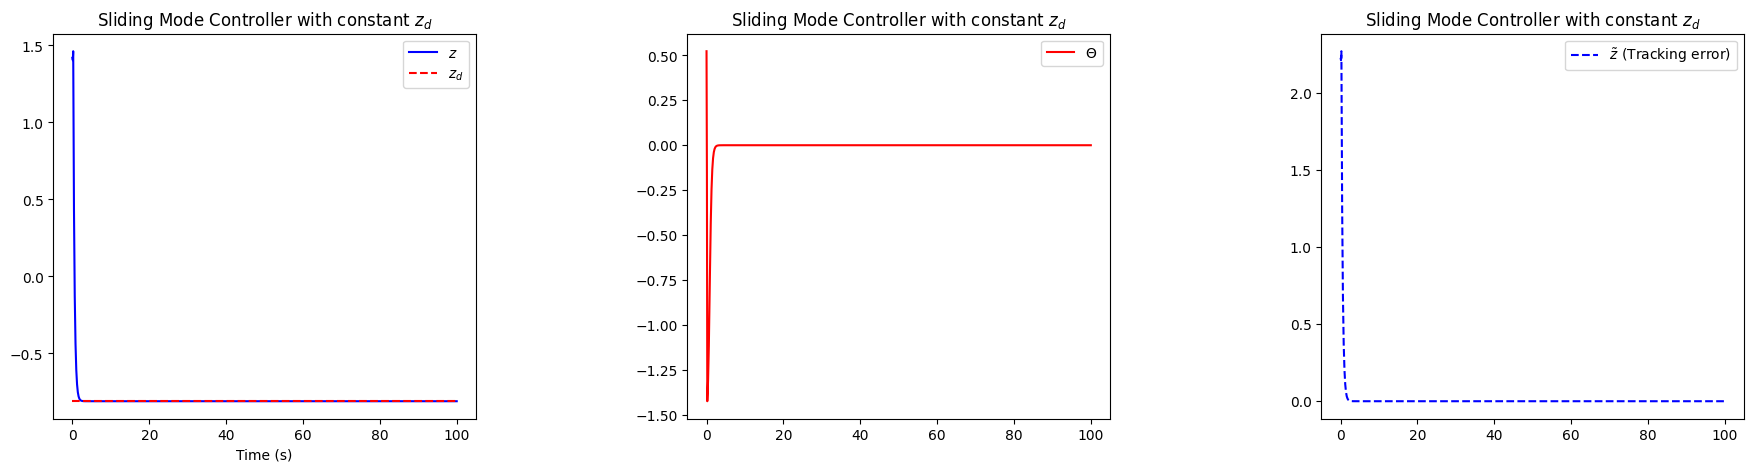

In [ ]:
# To complete
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def sat(value): #histerese
  if abs(value) < 1:
    return value
  else:
    return np.sign(value)


def z_d_signal_cte(t):
  return -.81

def z_d_signal_ncte(t):
  if t < 10:
    return 0
  elif t >= 10 and t < 30:
    return 1
  elif t >= 30:
    return np.sin(0.05*t)

def z_d_dot(t): #derivative of ncte
  if t < 10:
    return 0
  elif t >= 10 and t < 30:
    return 0
  elif t >= 30:
    return np.cos(0.05*t) * 0.05

def sliding_sys_cte(y, t):
    k1 = 1
    k2 = 1
    v_d = 1
    z_d = z_d_signal_cte(t)
    epsilon = 0.1 #region where we consider s=0
    lambd = 3.0
    x1 = y[1] - z_d #\tilde z
    x2 = np.tan(y[3]) #tan(\theta)

    Bx = abs(x2 * 3 * lambd) + 5

    s = lambd * x1 + x2

    q = - sat(s/epsilon) * Bx
    #q = 4

    dx = v_d

    if (abs(s) >= epsilon):
      dz = - v_d * np.tan(y[3])
    else:
      dz = -lambd * x1 + s

    dw = 0
    dtheta = q

    return [dx,dz,dw,dtheta]

def sliding_sys_ncte(y, t):
    k1 = 1
    k2 = 1
    v_d = 1
    z_d = z_d_signal_ncte(t)
    z_ddot = z_d_dot(t)
    epsilon = 0.1
    lambd = 3.90
    x1 = y[1] - z_d
    x2 = np.tan(y[3])

    Bx = abs(x2 * 1.5 * lambd) + 5

    s = lambd * x1 + x2

    q = - sat(s/epsilon) * Bx

    dx = v_d

    if (abs(s) >= epsilon):
      #dz = - v_d * np.tan(y[3])
      dz = - v_d * np.tan(y[3]) + z_ddot
    else:
      dz = -lambd * x1 + s  + z_ddot

    dw = 0
    dtheta = q

    return [dx,dz,dw,dtheta]

t = np.linspace(0, 100, 1000)

y0 = [0, 1.42, 0, 3.14/6]  # z, theta´

y = odeint(sliding_sys_cte, y0, t)
x11,z11,w11, theta11 = y.T
z_d_values_cte = [z_d_signal_cte(i) for i in t]
# # Plot
# plt.figure(figsize=(10, 5))
# plt.plot(t, z11, 'b-', label='z')
# plt.plot(t, theta11, 'g-', label='$\Theta$')
# plt.plot(t, z_d_values, 'r--', label='z_d')
# plt.xlabel('Time')
# plt.ylabel('z')
# plt.legend()
# plt.title('Sliding Mode Controller')
# plt.show()

y = odeint(sliding_sys_ncte, y0, t)
x12,z12,w12, theta12 = y.T
z_d_values_ncte = [z_d_signal_ncte(i) for i in t]



# plt.figure(figsize=(10, 5))
# plt.plot(t, z12, 'b-', label='z')
# plt.plot(t, theta12, 'g-', label='$\Theta$')
# plt.plot(t, z_d_values, 'r--', label='z_d')
# plt.xlabel('Time')
# plt.ylabel('z')
# plt.legend()
# plt.title('Sliding Mode Controller')
# plt.show()

error_tracking_cte = np.zeros(len(t))
error_tracking_ncte = np.zeros(len(t))

for i in range (len(t)):
  error_tracking_cte[i] = z11[i] - z_d_values_cte[i]
  error_tracking_ncte[i] = z12[i] - z_d_values_ncte[i]



fig20 = plt.figure(figsize = (30, 5))
fig20.subplots_adjust(wspace = 0.5, hspace = 0.3)

fig21 = plt.figure(figsize = (30, 5))
fig21.subplots_adjust(wspace = 0.5, hspace = 0.3)


ax1 = fig20.add_subplot(1,4,1)
ax2 = fig20.add_subplot(1,4,2)
ax3 = fig20.add_subplot(1,4,3)



ax4 = fig21.add_subplot(1,4,1)
ax5 = fig21.add_subplot(1,4,2)
ax6 = fig21.add_subplot(1,4,3)



#plt.figure(figsize=(10, 5))
ax1.plot(t, z11, 'b-', label='$z$')
ax2.plot(t, theta11, 'r-', label='$\Theta$')
ax1.plot(t,z_d_values_cte,'r--',label='$z_d$')
ax3.plot(t,error_tracking_cte,'b--',label=r'$\tilde z$ (Tracking error)')

ax1.set_title('Sliding Mode Controller with constant $z_d$')
ax2.set_title('Sliding Mode Controller with constant $z_d$')
ax3.set_title('Sliding Mode Controller with constant $z_d$')


ax4.plot(t, z12, 'b-', label='$z$')
ax5.plot(t, theta12, 'r-', label='$\Theta$')
ax4.plot(t,z_d_values_ncte,'r--',label='$z_d$')
ax6.plot(t,error_tracking_ncte,'b--',label=r'$\tilde z$ (Tracking error)')

ax5.set_title('Sliding Mode Controller with variable $z_d$')
ax4.set_title('Sliding Mode Controller with variable $z_d$')
ax6.set_title('Sliding Mode Controller with variable $z_d$')



ax1.set_xlabel('Time (s)')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()

ax1.legend(lines1, labels1)
ax2.legend(lines2, labels2)
ax3.legend(lines3, labels3)
ax4.legend(lines1, labels1)
ax5.legend(lines2, labels2)
ax6.legend(lines3, labels3)



plt.xlabel('Time (s)')

plt.show()


